220221.65761249018
650325.9167876205


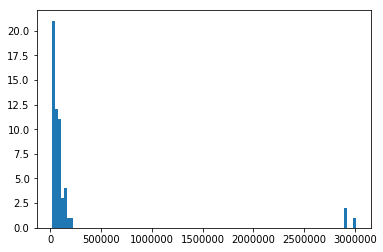

In [3]:
import sys
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

def openAsImage(fname):        
    fits_image = fits.open(fname)[0].data
    #img = np.zeros((200,200,3))
    #img2 = np.zeros_like(img)
    #img2[:,:,0] = fits_image
    #img2[:,:,1] = fits_image
    #img2[:,:,2] = fits_image
    #print(fits_image.info())
    return fits_image

def distance(true_coords_vector, coords_vector):
    distance_from_true = 0
    true_coords = []
    for i in true_coords_vector:
        if i not in true_coords:
            true_coords.append(i)
    coords = []
    for i in coords_vector:
        if i not in true_coords:
            coords.append(i)
    for i in range(len(true_coords)):
        true_coord = true_coords[i]
        coord = (max(coords, key =lambda i : -((i[0] - true_coord[0])**2+(i[1] - true_coord[1])**2)))
        distance_from_true +=  ((coord[0] - true_coord[0])**2+(coord[1] - true_coord[1])**2)
    distance_from_found = 0
    for i in range(len(coords)):
        coord = coords[i]
        true_coord = (max(true_coords, key =lambda i : -((i[0] - coord[0])**2+(i[1] - coord[1])**2)))
        distance_from_found +=  ((coord[0] - true_coord[0])**2+(coord[1] - true_coord[1])**2)
    return distance_from_found + distance_from_true

def load_obj(name ):
    
    with open('/media/mariia/Maxtor/database5/results/' + name + '.pkl', 'rb') as f:
        return pickle.load(f, encoding='bytes')

distances = []
for i in os.listdir("/media/mariia/Maxtor/database5/results/"):
    d =load_obj(i[:-4])
    """
    
    plt.imshow(d[b'fin_fits'], cmap='viridis')
    plt.title("Recovered image")
    plt.show()
    plt.imshow(d[b'observations'], cmap='viridis')
    plt.title("Original noised image")
    plt.show()
    plt.imshow(d[b'original'], cmap='viridis')
    plt.title("Original image")
    plt.show()
    print(d[b'koefs'])
    print('Recovered indexes: ' + str(d[b'indexes']))
    print('Real indexes(no order): ' + str(np.array(d[b'original_coords']).astype(int)))"""
    distances.append(distance(d[b'original_coords'], d[b'indexes']))
print(np.mean(distances))
print(np.std(distances))
plt.hist(distances, bins=100)
plt.show()


In [2]:
load_obj("combination_0.601995915992_sky248_1.41898759345_sky235")

{b'final_fits': b'/media/mariia/Maxtor/database5/sky235.fits',
 b'sky_number_points': b'sky248',
 b'sources': [],
 b'fin_fits': array([[2.2062635e-04, 2.3571233e-04, 2.5264625e-04, ..., 5.4987669e-03,
         4.8941830e-03, 4.3675210e-03],
        [2.2675218e-04, 2.4295879e-04, 2.6012745e-04, ..., 5.6153671e-03,
         4.9927724e-03, 4.4503449e-03],
        [2.3303124e-04, 2.5005220e-04, 2.6759313e-04, ..., 5.7080085e-03,
         5.0696982e-03, 4.5154970e-03],
        ...,
        [8.8903283e-07, 8.9764109e-07, 9.0613014e-07, ..., 8.0998291e-07,
         8.0410064e-07, 7.9812537e-07],
        [8.6537284e-07, 8.7393948e-07, 8.8238710e-07, ..., 7.9007486e-07,
         7.8421681e-07, 7.7832669e-07],
        [8.4178623e-07, 8.5022521e-07, 8.5863212e-07, ..., 7.7015721e-07,
         7.6448993e-07, 7.5907843e-07]], dtype=float32),
 b'file_to_write': b'combination_0.601995915992_sky248_1.41898759345_sky235',
 b'src_points': b'/media/mariia/Maxtor/database5/sky248_coord_ra311.785213992_dec